In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import datetime

In [3]:
dataset = pd.read_csv('weblog.csv')
dataset.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1 ...,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1 ...,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1 ...,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1 ...,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1 ...,200


In [4]:
dataset.iloc[0:1,0]

0    10.128.2.1 
Name: IP         , dtype: object

In [5]:
df = dataset.iloc[:580,:]
df.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1 ...,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1 ...,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1 ...,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1 ...,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1 ...,200


In [6]:
data = {'IP_Address':['10.128.2.1'], 'Time_Difference_Mean':[99], 'Time_Difference_Variance':[54], 'Time_Difference_Sum':[105], 'Time_Difference_Maximum':[15], 'Character-bigrams':[45], 'Character-trigrams':[34], 'Character-ngrams':[74], 'Count_of_most_visited_page':[14], 'Status':[200], 'Number_of_records':[40]}
work_dataset = pd.DataFrame(data)
work_dataset

,IP_Address,Time_Difference_Mean,Time_Difference_Variance,Time_Difference_Sum,Time_Difference_Maximum,Character-bigrams,Character-trigrams,Character-ngrams,Count_of_most_visited_page,Status,Number_of_records
0,10.128.2.1,99,54,105,15,45,34,74,14,200,40


In [7]:
def time_stats(dataframe):
    time_array = dataframe.iloc[:, 1].values
    max_time_diff = 0
    count = 0
    sum_time_diff = 0
    for i in range(1, len(time_array)):
        time1 = time_array[i]
        time2 = time_array[i-1]
        index1 = 0
        for char in time1:
            if(char==':'):
                break
            index1 = index1 +1
        time1 = time1[index1+1:]
        index2 = 0
        for char in time2:
            if(char==':'):
                break
            index2 = index2 + 1
        time2 = time2[index2+1:]
        dtime1 = datetime.datetime.strptime(time1, '%H:%M:%S')
        dtime2 = datetime.datetime.strptime(time2, '%H:%M:%S')
        diff = (dtime1 - dtime2).seconds
        sum_time_diff = sum_time_diff + diff
        count = count + 1
        
        if max_time_diff < diff:
            max_time_diff = diff
    
    mean_time_diff = 0
    if count!=0:
        mean_time_diff = sum_time_diff/count
    
    var_sum = 0
    for i in range(1, len(time_array)):
        time1 = time_array[i]
        time2 = time_array[i-1]
        index1 = 0
        for char in time1:
            if(char==':'):
                break
            index1 = index1 +1
        time1 = time1[index1+1:]
        index2 = 0
        for char in time2:
            if(char==':'):
                break
            index2 = index2 + 1
        time2 = time2[index2+1:]
        dtime1 = datetime.datetime.strptime(time1, '%H:%M:%S')
        dtime2 = datetime.datetime.strptime(time2, '%H:%M:%S')
        diff = (dtime1 - dtime2).seconds
        curvar = (mean_time_diff-diff)*(mean_time_diff-diff)
        var_sum = var_sum + curvar
    
    variance_time_diff = 0
    if count != 0:
        variance_time_diff = var_sum/count
    return max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff

In [8]:
time_stats(df)

ValueError: unconverted data remains:  

In [ ]:
import re
import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams

In [ ]:
def most_frequent(List): 
    return max(set(List), key = List.count)

In [ ]:
def bigram_stats(dataframe):
    url_array = dataframe.iloc[:,2].values
    full_string = ""
    for url in url_array:
        full_string = full_string + url
    full_string = full_string.lower()
    full_string = re.sub(r'\d+', '', full_string)
    table = str.maketrans({key: None for key in string.punctuation})
    full_string = full_string.translate(table) 
    full_string = full_string.strip()
    full_string_tokens = word_tokenize(full_string)
    for char in full_string_tokens:
        if char == 'get':
            full_string_tokens.remove('get')
    for char in full_string_tokens:
        if char == 'httpget':
            full_string_tokens.remove('httpget')
    for char in full_string_tokens:
        if char == 'httppost':
            full_string_tokens.remove('httppost')
    for char in full_string_tokens:
        if char == 'post':
            full_string_tokens.remove('post')
    
    count_most_visited_page = 0
    if len(full_string_tokens)!=0:
        most_visited_page = most_frequent(full_string_tokens)
        count_most_visited_page = full_string_tokens.count(most_visited_page)
        
    
    count_most_appearing_bigram = 0
    bigrams = list(nltk.bigrams(full_string_tokens))
    if len(bigrams)!=0:
        most_appearing_bigram = most_frequent(bigrams)
        count_most_appearing_bigram = bigrams.count(most_appearing_bigram)
    
    count_most_appearing_trigram = 0
    trigrams = list(nltk.trigrams(full_string_tokens))
    if len(trigrams)!=0:
        most_appearing_trigram = most_frequent(trigrams)
        count_most_appearing_trigram = trigrams.count(most_appearing_trigram)
    
    count_most_appearing_ngram = 0
    ngrams = list(nltk.ngrams(full_string_tokens, 6))
    if len(ngrams)!=0:
        most_appearing_ngram = most_frequent(ngrams)
        count_most_appearing_ngram = ngrams.count(most_appearing_ngram)
        
    return count_most_visited_page, count_most_appearing_bigram, count_most_appearing_trigram, count_most_appearing_ngram

In [ ]:
bigram_stats(df)

(79, 27, 17, 5)

In [ ]:
from collections import Counter

In [ ]:
def most_visited_ip(dataframe):
    ip = dataframe.iloc[:,0].values
    x = Counter(ip)
    return x.most_common(1)[0][0]

In [ ]:
most_visited_ip(df)

'10.131.2.1'

In [ ]:
def most_freq_status(dataframe):
    status = dataframe.iloc[:,3].values
    x = Counter(status)
    return x.most_common(1)[0][0]

In [ ]:
most_freq_status(df)

200

In [ ]:
startindex = 0
endindex = 0
prevdate = ""
p = 1
for i,row in dataset.iterrows():
    
    date = row['Time'][1:12]
    if i==0:
        prevdate = date
    else:
        if date == prevdate:
            endindex = endindex + 1
        else:
            data = dataset.iloc[startindex:endindex+1, :]
            max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff = time_stats(data)
            #print(max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff)
            count_most_visited_page, count_most_appearing_bigram, count_most_appearing_trigram, count_most_appearing_ngram = bigram_stats(data)
            #print(count_most_visited_page, count_most_appearing_bigram, count_most_appearing_trigram, count_most_appearing_ngram)
            most_vis_ip = most_visited_ip(data)
            most_frequent_status = most_freq_status(data)
            #print(most_vis_ip, most_frequent_status, end = ' ')
            #print()
            if most_vis_ip == None:
                most_vis_ip = '10.130.2.1'
            if most_frequent_status == None:
                most_frequent_status = 200
            work_dataset.loc[p]=[count_most_appearing_bigram, count_most_appearing_ngram, count_most_appearing_trigram, count_most_visited_page, most_vis_ip, endindex - startindex + 1, most_frequent_status, max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff]
            startindex = endindex
            #endindex = endindex + 1
            prevdate = date
            p = p + 1
            #print(max_time_diff, mean_time_diff, sum_time_diff, variance_time_diff)

In [ ]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,IP_Address,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance
0,45,74,34,14,10.128.2.1,40,200,15,99.000000,105,5.400000e+01
1,27,5,17,79,10.131.2.1,580,200,23466,95.583765,55343,1.112702e+06
2,69,26,46,343,10.131.0.1,2991,200,86399,143.820401,430023,1.013628e+07
3,13,5,10,44,10.131.0.1,468,200,9569,189.541756,88516,8.867826e+05
4,16,4,10,32,10.130.2.1,168,200,12157,508.694611,84952,2.615859e+06
5,4,1,3,9,10.129.2.1,105,200,13917,619.836538,64463,5.431493e+06
6,1,0,0,1,10.129.2.1,1,200,0,0.000000,0,0.000000e+00
7,11,3,9,19,10.129.2.1,53,200,17173,1876.403846,97573,9.804989e+06
8,12,2,8,27,10.130.2.1,118,200,8862,815.641026,95430,3.808648e+06
9,8,4,7,11,10.129.2.1,32,302,25251,2139.096774,66312,2.234125e+07


In [ ]:
Ip_rep = np.array([])
for i,row in work_dataset.iterrows():
    ip = row[4]
    ip = ip.replace('.', '')
    a = int(ip)
    Ip_rep = np.append(Ip_rep, a)
Ip_rep
work_dataset['IP_rep'] = Ip_rep

In [ ]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,IP_Address,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance,IP_rep
0,45,74,34,14,10.128.2.1,40,200,15,99.000000,105,5.400000e+01,1012821.0
1,27,5,17,79,10.131.2.1,580,200,23466,95.583765,55343,1.112702e+06,1013121.0
2,69,26,46,343,10.131.0.1,2991,200,86399,143.820401,430023,1.013628e+07,1013101.0
3,13,5,10,44,10.131.0.1,468,200,9569,189.541756,88516,8.867826e+05,1013101.0
4,16,4,10,32,10.130.2.1,168,200,12157,508.694611,84952,2.615859e+06,1013021.0
5,4,1,3,9,10.129.2.1,105,200,13917,619.836538,64463,5.431493e+06,1012921.0
6,1,0,0,1,10.129.2.1,1,200,0,0.000000,0,0.000000e+00,1012921.0
7,11,3,9,19,10.129.2.1,53,200,17173,1876.403846,97573,9.804989e+06,1012921.0
8,12,2,8,27,10.130.2.1,118,200,8862,815.641026,95430,3.808648e+06,1013021.0
9,8,4,7,11,10.129.2.1,32,302,25251,2139.096774,66312,2.234125e+07,1012921.0


In [ ]:
work_dataset.drop('IP_Address', axis=1, inplace=True)

In [ ]:
work_dataset

,Character-bigrams,Character-ngrams,Character-trigrams,Count_of_most_visited_page,Number_of_records,Status,Time_Difference_Maximum,Time_Difference_Mean,Time_Difference_Sum,Time_Difference_Variance,IP_rep
0,45,74,34,14,40,200,15,99.000000,105,5.400000e+01,1012821.0
1,27,5,17,79,580,200,23466,95.583765,55343,1.112702e+06,1013121.0
2,69,26,46,343,2991,200,86399,143.820401,430023,1.013628e+07,1013101.0
3,13,5,10,44,468,200,9569,189.541756,88516,8.867826e+05,1013101.0
4,16,4,10,32,168,200,12157,508.694611,84952,2.615859e+06,1013021.0
5,4,1,3,9,105,200,13917,619.836538,64463,5.431493e+06,1012921.0
6,1,0,0,1,1,200,0,0.000000,0,0.000000e+00,1012921.0
7,11,3,9,19,53,200,17173,1876.403846,97573,9.804989e+06,1012921.0
8,12,2,8,27,118,200,8862,815.641026,95430,3.808648e+06,1013021.0
9,8,4,7,11,32,302,25251,2139.096774,66312,2.234125e+07,1012921.0


In [ ]:
X = work_dataset.iloc[:,:].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.00385577e-01,  1.55284848e+00,  2.20414998e-01,
        -1.59613886e-01, -2.74445198e-01, -1.74077656e-01,
        -1.11689269e+00, -1.11804510e+00, -1.23634929e+00,
        -6.43519162e-01, -1.54276043e+00],
       [-1.26520921e-02, -9.14677166e-02,  8.61139227e-03,
         1.09350421e-01,  5.02849647e-01, -1.74077656e-01,
        -2.29152112e-01, -1.12246687e+00, -5.12612971e-01,
        -6.13116048e-01,  1.20351468e+00],
       [ 2.51102469e-01,  4.08976342e-01,  3.69923425e-01,
         1.20175930e+00,  3.97332719e+00, -1.74077656e-01,
         2.15318457e+00, -1.06003219e+00,  4.39649896e+00,
        -3.66546632e-01,  1.02042968e+00],
       [-1.00570279e-01, -9.14677166e-02, -7.86018571e-02,
        -3.54765138e-02,  3.41632939e-01, -1.74077656e-01,
        -7.55224807e-01, -1.00085315e+00, -7.79754930e-02,
        -6.19289300e-01,  1.02042968e+00],
       [-8.17306677e-02, -1.15298386e-01, -7.86018571e-02,
        -8.51314627e-02, -9.01975309e-02, -1.74077656e-01,
  

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5,random_state = 0)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([3, 0, 2, 0, 0, 3, 3, 3, 0, 4, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3,
       0, 3, 0, 0, 0, 3, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 4, 0, 2, 0, 2, 2, 3, 3, 3, 0, 0, 0, 3,
       0, 0])

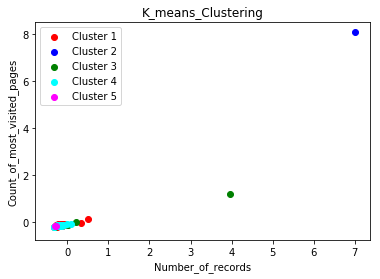

In [ ]:
plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 3], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 3], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 3], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 4], X[y_kmeans == 3, 3], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 4], X[y_kmeans == 4, 3], c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K_means_Clustering')
plt.xlabel('Number_of_records')
plt.ylabel('Count_of_most_visited_pages')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

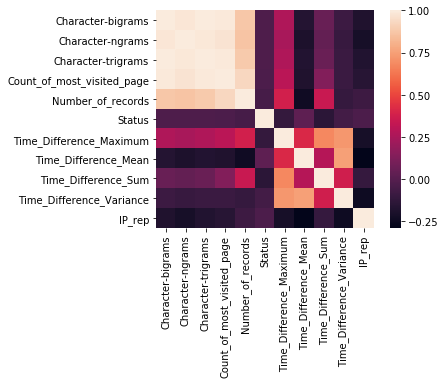

In [ ]:
cor = work_dataset.corr()
sns.heatmap(cor, square = True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation 

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = model.fit_predict(X)
clust_labels1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 3, 4, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
agglomerative = pd.DataFrame(clust_labels1)

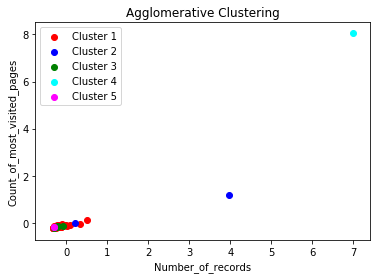

In [ ]:
plt.scatter(X[clust_labels1 == 0, 4], X[clust_labels1 == 0, 3], c = 'red', label = 'Cluster 1')
plt.scatter(X[clust_labels1 == 1, 4], X[clust_labels1 == 1, 3], c = 'blue', label = 'Cluster 2')
plt.scatter(X[clust_labels1 == 2, 4], X[clust_labels1 == 2, 3], c = 'green', label = 'Cluster 3')
plt.scatter(X[clust_labels1 == 3, 4], X[clust_labels1 == 3, 3], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clust_labels1 == 4, 4], X[clust_labels1 == 4, 3], c = 'magenta', label = 'Cluster 5')
plt.title('Agglomerative Clustering')
plt.xlabel('Number_of_records')
plt.ylabel('Count_of_most_visited_pages')
plt.legend()
plt.show()

In [ ]:
model_affinity = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
model_affinity.fit(X)
clust_labels2 = model_affinity.predict(X)
cent2 = model_affinity.cluster_centers_
affinity = pd.DataFrame(clust_labels2)

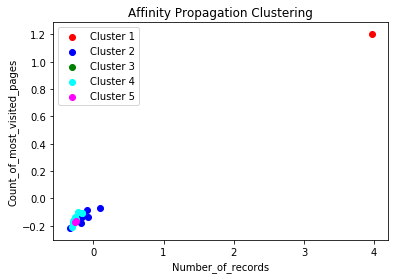

In [ ]:
plt.scatter(X[clust_labels2 == 0, 4], X[clust_labels2 == 0, 3], c = 'red', label = 'Cluster 1')
plt.scatter(X[clust_labels2 == 1, 4], X[clust_labels2 == 1, 3], c = 'blue', label = 'Cluster 2')
plt.scatter(X[clust_labels2 == 2, 4], X[clust_labels2 == 2, 3], c = 'green', label = 'Cluster 3')
plt.scatter(X[clust_labels2 == 3, 4], X[clust_labels2 == 3, 3], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clust_labels2 == 4, 4], X[clust_labels2 == 4, 3], c = 'magenta', label = 'Cluster 5')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Number_of_records')
plt.ylabel('Count_of_most_visited_pages')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0).fit(X)
clust_labels3 = clustering.labels_

C:\Users\hp\Anaconda3\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [ ]:
clust_labels3

array([1, 0, 4, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 4, 0, 4, 1, 0, 0, 0, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 0, 2, 3, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

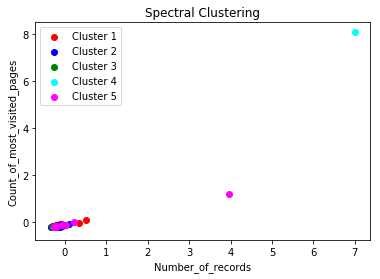

In [ ]:
plt.scatter(X[clust_labels3 == 0, 4], X[clust_labels3 == 0, 3], c = 'red', label = 'Cluster 1')
plt.scatter(X[clust_labels3 == 1, 4], X[clust_labels3 == 1, 3], c = 'blue', label = 'Cluster 2')
plt.scatter(X[clust_labels3 == 2, 4], X[clust_labels3 == 2, 3], c = 'green', label = 'Cluster 3')
plt.scatter(X[clust_labels3 == 3, 4], X[clust_labels3 == 3, 3], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clust_labels3 == 4, 4], X[clust_labels3 == 4, 3], c = 'magenta', label = 'Cluster 5')
plt.title('Spectral Clustering')
plt.xlabel('Number_of_records')
plt.ylabel('Count_of_most_visited_pages')
plt.legend()
plt.show()